In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import scipy.linalg as la

# Regressão multilinear

Um dos modelos mais simples e flexíveis para a predição de variáveis contínuas é o modelo de regressão multilinear:

$$y_i = w_0 + w_1 x_{i1} + w_2 x_{i2} + \cdots + w_M x_{iM} = \vec{x}_i\cdot \vec{w}
$$

Onde $y_i$ é a variável que queremos prever (*label*) para o $i$-ésimo exemplo, a partir das $M$ variáveis conhecidas (atributos, *features*) $x_{ij}$ ($j=1,2,\dots,M$).

Cada exemplo é representado pelo seu vetor de atributos $\vec{x}_i$ e é comum armazenar todo o conjuto de $N$ exemplos em uma matriz $X$  ($N\times M+1$) da forma:

$$X = \begin{bmatrix} \vec{x}_1^T \\ \vec{x}_2^T \\ \vdots \\ \vec{x}_M^T
\end{bmatrix} = \begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1M} \\
1 & x_{21} & x_{22} & \cdots & x_{2M} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{N1} & x_{N2} & \cdots & x_{NM} \\
\end{bmatrix}
$$

onde é comum adicionar uma coluna constante de valor $1$ aos atributos. Dessa forma, o modelo de regressão multilinear se escreve como uma única equação matricial:

$$
X\vec{w} = \vec{y},
$$

cuja solução de mínimos quadrados é dada pelas equações normais:

$$\begin{align}
X^TX\vec{w} = &X^T\vec{y}\\
\vec{w} = & \left(X^TX\right)^{-1}X^T\vec{y}
\end{align}
$$

## Carregamento de dados

O arquivo `ES_silic.xlsx` contém dados de perfis de poços com medidas de **z**, **gr**, **rho**, **nphi**, **dt_p**, **facies** e **dt_s**.

In [2]:
df = ... # SEU CODIGO AQUI
df

,poco,z,gr,rho,nphi,dt_p,dt_s,facies
0,1-ESS-130,1894.941772,20.983772,NaN,NaN,250.546437,NaN,NaN
1,1-ESS-130,1895.094172,23.154465,NaN,NaN,249.500296,NaN,NaN
2,1-ESS-130,1895.246572,20.554451,NaN,NaN,251.057033,NaN,NaN
3,1-ESS-130,1895.398972,19.792778,NaN,NaN,252.270707,NaN,NaN
4,1-ESS-130,1895.551372,17.350235,NaN,NaN,252.129702,NaN,NaN
...,...,...,...,...,...,...,...,...
32986,3-ESS-131,4696.968118,125.296654,NaN,NaN,NaN,NaN,ARENITO
32987,3-ESS-131,4697.120518,140.335007,NaN,NaN,NaN,NaN,ARENITO
32988,3-ESS-131,4697.272918,155.187271,NaN,NaN,NaN,NaN,ARENITO
32989,3-ESS-131,4697.425318,164.390915,NaN,NaN,NaN,NaN,ARENITO


In [3]:
# eliminando linhas com dados incompletos
df = ... # SEU CODIGO AQUI para eliminar linhas com NaN
df.sample(10)

,poco,z,gr,rho,nphi,dt_p,dt_s,facies
26269,3-ESS-131,3673.297318,156.981964,2.488444,21.770199,94.762813,177.121750,FOLHELHO
29848,3-ESS-131,4218.736918,149.893402,2.491554,18.978775,75.726913,142.001466,FOLHELHO
16054,1-ESS-130,4341.571372,45.958878,2.576535,16.029003,73.329309,131.543691,CALCILUTITO
5125,1-ESS-130,2675.991772,103.613281,2.038444,35.887172,137.586030,421.088647,ARENITO
16095,1-ESS-130,4347.819772,35.349854,2.614908,9.529192,62.950975,119.583631,CALCILUTITO
23143,3-ESS-131,3196.894918,122.359680,2.369656,23.988735,105.494384,223.879349,SILTITO
12083,1-ESS-130,3736.390972,83.978531,2.385960,38.005064,103.239170,216.227237,FOLHELHO
17398,1-ESS-130,4546.396972,28.962675,2.571496,12.280957,73.567235,141.770447,CALCARENITO
23290,3-ESS-131,3219.297718,138.155716,2.331476,25.924737,101.790630,218.378811,SILTITO
30055,3-ESS-131,4250.283718,101.916763,2.434445,12.623763,74.642303,136.224497,ARENITO


## One hot enconding

Uma das formas de transformar a informação textual da coluna `facies` em uma informação numérica é através do dito *one hot encoding*, implementado pela função `pd.get_dummies`. Esse esquema cria uma nova coluna para cada valor categórico distinto, com valores $0$ ou $1$, de acordo com o valor de cada linha do conjunto de dados.

Uma das opções de `pd.get_dummies` é o argumento `drop_first`, que elimina a primeira coluna de *dummies*, uma vez que ela pode ser inferida a partir das outras. Nesta aplicação, utilize `drop_first=False`.

In [4]:
one_hot = pd.get_dummies(df['facies'],drop_first=False) 
display(one_hot.sample(5))
one_hot.sum() # contando o numero de exemplos de cada facies

,ANIDRITA,AREIA,ARENITO,CALCARENITO,CALCILUTITO,DOLOMITO,FOLHELHO,MARGA,SILTITO
15936,False,False,True,False,False,False,False,False,False
25695,False,False,False,False,False,False,True,False,False
20756,False,False,True,False,False,False,False,False,False
18573,False,False,False,False,False,False,False,True,False
27985,False,False,True,False,False,False,False,False,False


ANIDRITA         114
AREIA              7
ARENITO        11566
CALCARENITO     1091
CALCILUTITO      708
DOLOMITO          69
FOLHELHO       11038
MARGA           2850
SILTITO          587
dtype: int64

 A classe `'AREIA'` tem muito poucos pontos. Vamos incorporar estes pontos na classe `'ARENITO'`:

In [5]:
df.loc[df['facies']=='AREIA','facies'] = 'ARENITO' # indexacao de DataFrame para mutacao eh chatinho...
one_hot = pd.get_dummies(df['facies'],drop_first=False)
one_hot.sum() # contando o numero de exemplos de cada facies

ANIDRITA         114
ARENITO        11573
CALCARENITO     1091
CALCILUTITO      708
DOLOMITO          69
FOLHELHO       11038
MARGA           2850
SILTITO          587
dtype: int64

In [6]:
one_hot_arr = one_hot.values.astype(bool)
litos = list(one_hot.columns)
cmap = {'ANIDRITA':'magenta', 'ARENITO':'xkcd:goldenrod', 'CALCARENITO':'cyan',
        'CALCILUTITO':'xkcd:dark blue', 'DOLOMITO':'purple', 'FOLHELHO':'green', 
        'MARGA':'xkcd:greenish blue', 'SILTITO':'xkcd:reddish orange'}

Vamos considerar o poco 1-ESS-130 como nosso conjunto de treino, e usar o 3-ESS-131 como teste cego

In [7]:
mask_treino = df['poco']=='1-ESS-130'
mask_teste  = ~mask_treino

df_treino = df[mask_treino]
df_teste  = df[mask_teste ]

one_hot_treino = one_hot_arr[mask_treino]
one_hot_teste  = one_hot_arr[mask_teste ]

Cada atributo é correlacionado com o **dt_s** de alguma forma. Observe o pairplot abaixo:

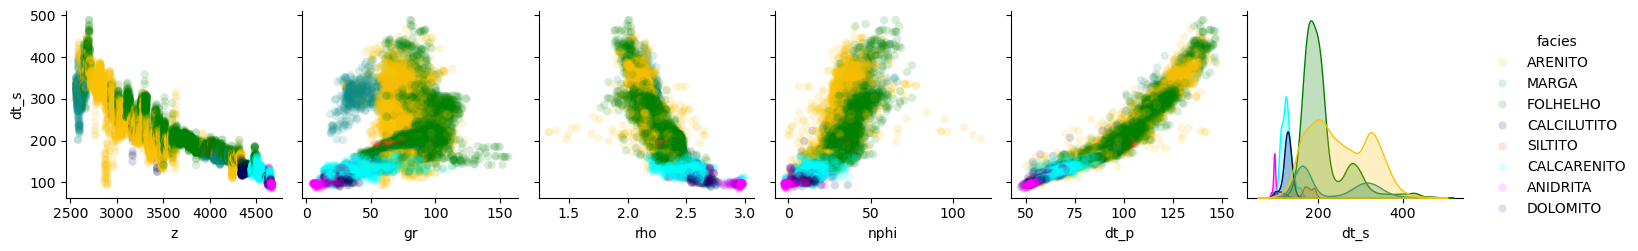

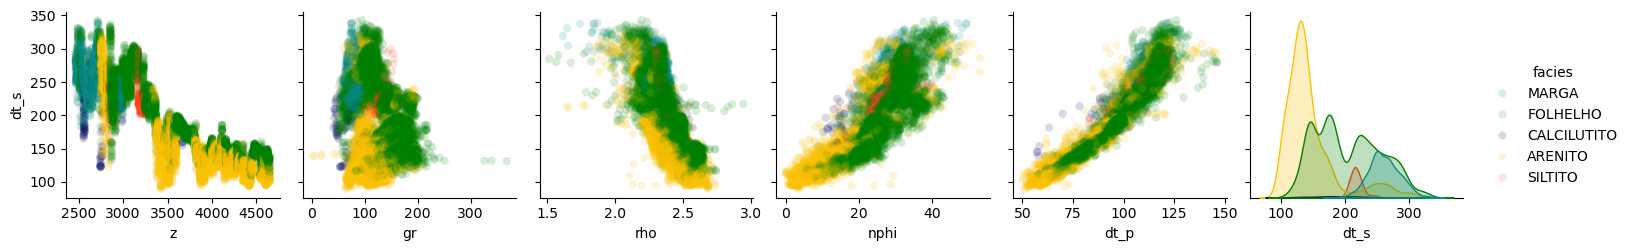

In [8]:
sns.pairplot(data=df_treino,x_vars=df.columns[1:-1],y_vars=['dt_s'], hue='facies',
             plot_kws={'alpha':0.15,'edgecolor':'none'},palette=cmap)
sns.pairplot(data=df_teste ,x_vars=df.columns[1:-1],y_vars=['dt_s'], hue='facies',
             plot_kws={'alpha':0.15,'edgecolor':'none'},palette=cmap)
plt.show() # demora uns 5s

A função abaixo vai ser útil para fazer os plots:

In [9]:
def per_facies_scatter(x,y,one_hot_arr,labels=None,xlabel=None,ylabel=None,
                       suptitle='',marker='.',linestyle='',cmap=cmap,*args,**kwargs):
    n_pts,n_groups = one_hot_arr.shape
    if labels is None: labels = ['']*n_groups
    nlin = int(np.floor(np.sqrt(n_groups+1)))
    ncol = int(np.ceil(n_groups/nlin))
    fig,axs = plt.subplots(nlin,ncol,sharex='all',sharey='all',
                           gridspec_kw={'wspace':0,'hspace':0})
    xy = np.concatenate((x.ravel(),y.ravel()))
    mM = xy.min(),xy.max()
    labels = ['Tudo'] + labels
    masks = np.column_stack((np.ones(n_pts,dtype=bool),one_hot_arr.astype(bool)))
    for i,(ax,mask,label) in enumerate(zip(axs.flat,masks.T,labels)):
        ax.plot(mM,mM,'k--'), ax.grid()
        if not mask.any(): #Se nao tem a classe, pula
            continue 
        x_mask,y_mask = x[mask],y[mask]
        MSE = ((x_mask-y_mask)**2).mean()
        RMSE = np.sqrt(MSE)
        R2 = 1 - MSE/y.var()
        cor = cmap.get(label,'C0')
        ax.plot(x_mask,y_mask,*args,marker=marker,linestyle=linestyle,color=cor,
                label=f'{label}\n{RMSE=:.2f}\n{R2=:.3f}',**kwargs)
        ax.legend(fontsize=8)
    if xlabel:
        axs[-1     ,ncol//2].set_xlabel(xlabel)
    if ylabel:
        axs[nlin//2,0      ].set_ylabel(ylabel)
    fig.suptitle(suptitle)
    plt.tight_layout()
    return fig,axs


## Seleção dos atributos

A proposta é utilizar os perfis medidos para **prever** o valor de **dt_s** (para prever este valor em um outro poço análogo, onde não foi corrido este perfil, por exemplo). 

In [10]:
features = [... , ... , ... ] # Sera que vale a pena usar 'z'? E 'nphi'?
label = ...

X_treino = df_treino[features].values # transformando em np.array
X_teste  = df_teste[features].values

y_treino = df_treino[label].values
y_teste  = df_teste[label].values

### Modelo de grau 1

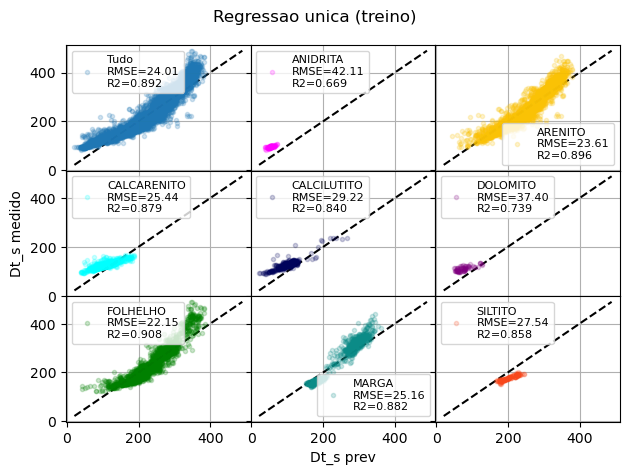

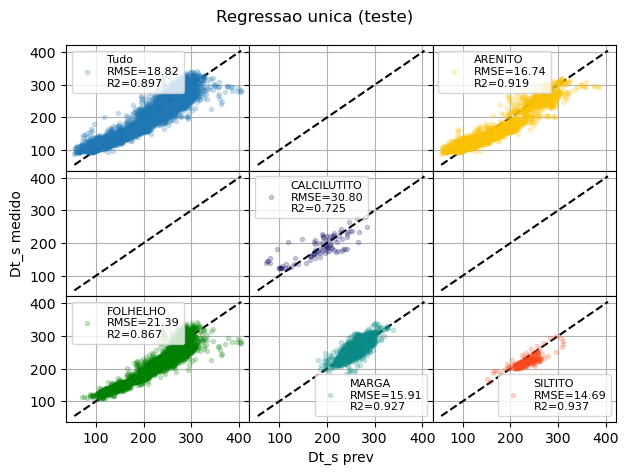

In [11]:
X1_treino = np.column_stack((np.ones(X_treino.shape[0]),X_treino)) # Adicionando a coluna de 1
X1_teste  = np.column_stack((np.ones(X_teste.shape[0] ),X_teste )) # Adicionando a coluna de 1

w1 = ... # SEU CODIGO AQUI para treinar o modelo
y_hat1_treino = ... # SEU CODIGO AQUI para fazer a inferencia nos dados de treino

y_hat1_teste = ... # SEU CODIGO AQUI para fazer a inferencia nos dados de teste

alp = 0.2 # opacidade
xlabel = 'Dt_s prev'
ylabel = 'Dt_s medido'

per_facies_scatter(y_hat1_treino, y_treino, one_hot_treino, litos,
                   alpha=alp, xlabel=xlabel, ylabel=ylabel,
                   suptitle='Regressao unica (treino)')
per_facies_scatter(y_hat1_teste, y_teste, one_hot_teste, litos,
                   alpha=alp, xlabel=xlabel, ylabel=ylabel,
                   suptitle='Regressao unica (teste)')

plt.show()

## Criação de novas features

Conhecido como *feature egineering*. Vamos criar atributos quadráticos para obter um regressor mais flexível (menos viés):

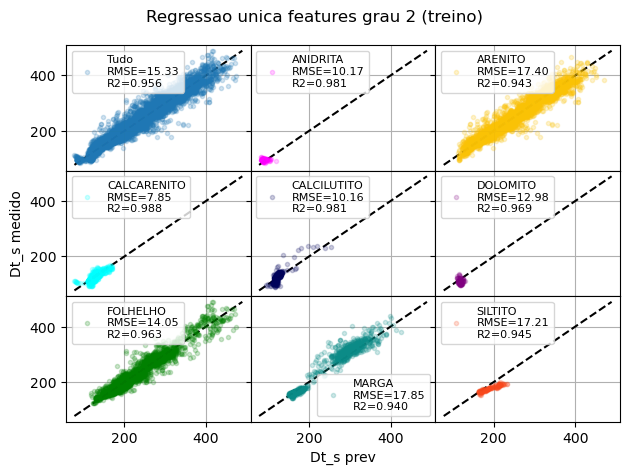

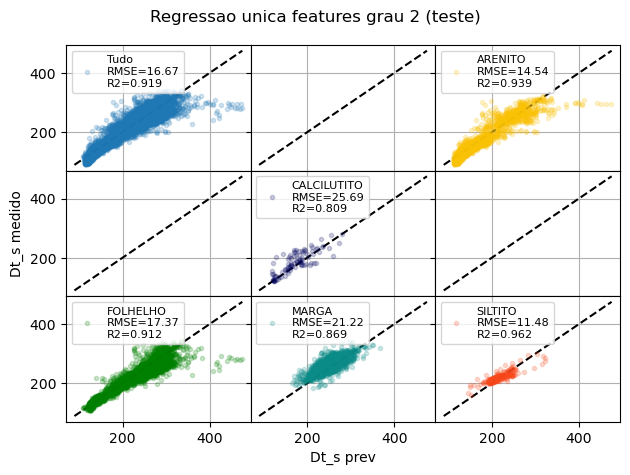

In [12]:
X2_treino = [] # inicializando
X2_teste  = [] # inicializando
ncols = X1_treino.shape[1]
for i in range(ncols):
    for j in range(i,ncols):
        X2_treino.append(X1_treino[:,i]*X1_treino[:,j])
        X2_teste.append(X1_teste[:,i]*X1_teste[:,j])

X2_treino = np.column_stack(X2_treino) # 1, rho, nphi, dt_p, rho**2, rho*nphi, rho*dt_p, nphi**2, nphi*dt_p, dt_p**2
X2_teste  = np.column_stack(X2_teste)  # 1, rho, nphi, dt_p, rho**2, rho*nphi, rho*dt_p, nphi**2, nphi*dt_p, dt_p**2

w2 = ... # SEU CODIGO AQUI para treinar o modelo
y_hat2_treino = ...  # SEU CODIGO AQUI para fazer a inferencia nos dados de treino

y_hat2_teste  = ...  # SEU CODIGO AQUI para fazer a inferencia nos dados de teste

per_facies_scatter(y_hat2_treino, y_treino, one_hot_treino, litos,
                   alpha=alp, xlabel=xlabel, ylabel=ylabel,
                   suptitle='Regressao unica features grau 2 (treino)')
per_facies_scatter(y_hat2_teste, y_teste, one_hot_teste, litos,
                   alpha=alp, xlabel=xlabel, ylabel=ylabel,
                   suptitle='Regressao unica features grau 2 (teste)')
plt.show()

## Separação por litologia

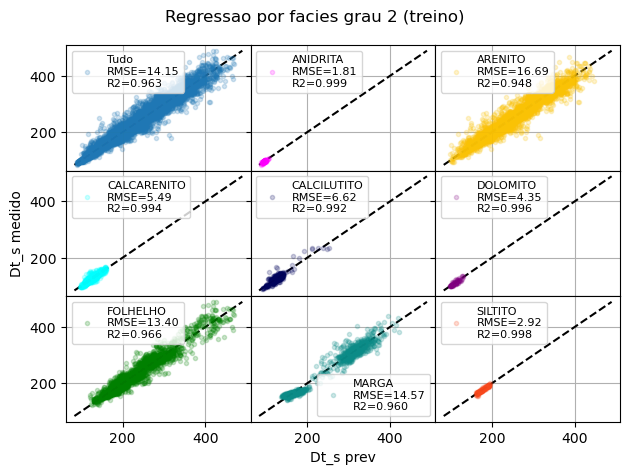

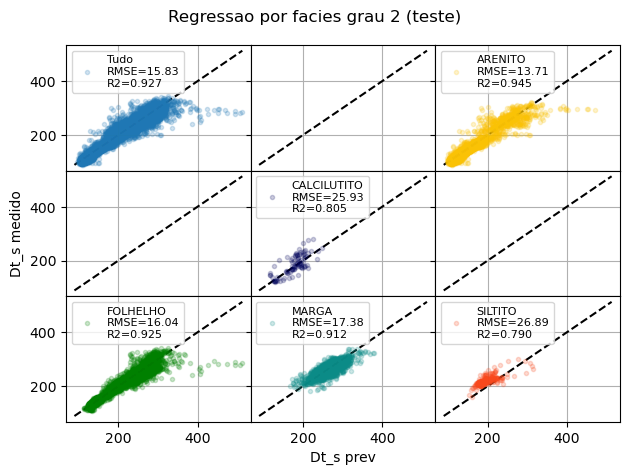

In [13]:
#                     n_pts, n_litos, n_feat                    n_pts, n_litos, n_feat
X3_treino = X2_treino[ :   ,  None  ,  :   ]*one_hot_treino[ :   ,  :     ,  None ] # broadcasting 
X3_teste  =  X2_teste[ :   ,  None  ,  :   ]* one_hot_teste[ :   ,  :     ,  None ] # broadcasting 

#                                          n_pts, n_feat*n_litos
X3_treino = X3_treino.reshape(X3_treino.shape[0], -1)
X3_teste  = X3_teste.reshape( X3_teste.shape[0] , -1)

w3 = ... # SEU CODIGO AQUI para treinar o modelo
y_hat3_treino = ... # SEU CODIGO AQUI para fazer a inferencia nos dados de treino

y_hat3_teste = ... # SEU CODIGO AQUI para fazer a inferencia nos dados de teste

per_facies_scatter(y_hat3_treino, y_treino, one_hot_treino, litos,
                   alpha=alp, xlabel=xlabel, ylabel=ylabel,
                   suptitle='Regressao por facies grau 2 (treino)')
per_facies_scatter(y_hat3_teste, y_teste, one_hot_teste, litos,
                   alpha=alp, xlabel=xlabel, ylabel=ylabel,
                   suptitle='Regressao por facies grau 2 (teste)')
plt.show()

## Usando diretamente o `sklearn`

In [14]:
import sklearn.preprocessing as skp
import sklearn.linear_model as skl
import sklearn.metrics as skm
import sklearn.pipeline as skpp

Para o treino, usamos os métodos `.fit()`, ou `.fit_transform()`:

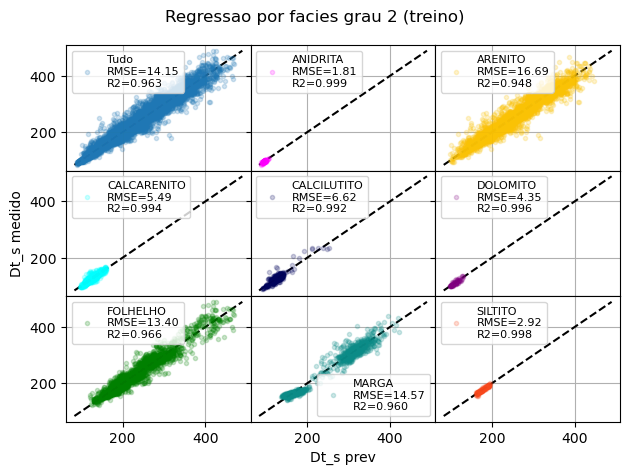

In [15]:
encoder = skp.OneHotEncoder(sparse_output=False) # instanciando o objeto
#encoder.fit(df_treino[['facies']]) # parametrizando o encoder
#one_hot_treino = encoder.transform(df_treino[['facies']]) # usando o encoder ja parametrizado
one_hot_treino = encoder.fit_transform(df_treino[['facies']]) # equivalente às duas linhas anteriores

poly = skp.PolynomialFeatures(degree=2) # instanciando o objeto
#poly.fit(X_treino) # parametrizando
#X_poly_treino = poly.transform(X_treino) # usando 
X_poly_treino = poly.fit_transform(X_treino) # equivalente às duas linhas anteriores

X_tudo_treino = X_poly_treino[:,None,:] * one_hot_treino[:,:,None]
X_tudo_treino = X_tudo_treino.reshape(len(X_tudo_treino),-1)

model = skl.LinearRegression(fit_intercept=False) # instanciando o objeto. Ja tem a coluna de 1 nas features, entao nao precisa de intercept
model.fit(X_tudo_treino,y_treino) # treinando os parametros
y_hat4_treino = model.predict(X_tudo_treino) # usando os parametros ja treinados

per_facies_scatter(y_hat4_treino, y_treino, one_hot_treino, litos,
                   alpha=alp, xlabel=xlabel, ylabel=ylabel,
                   suptitle=f'Regressao por facies grau {poly.degree} (treino)')
plt.show()

Para a inferência, usamos somente `.transform()` para as transformações e `.predict()` para o modelo.

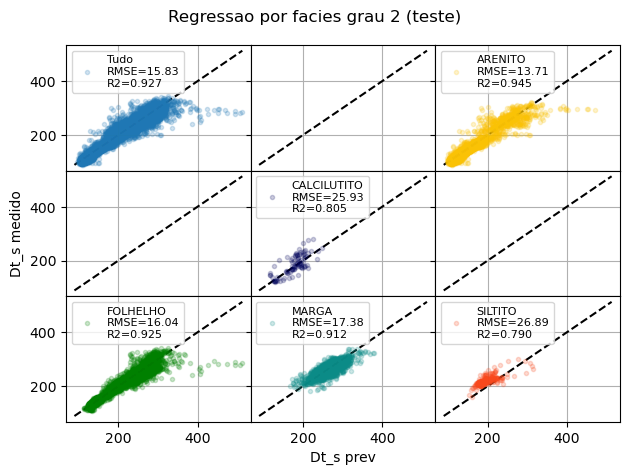

In [16]:
one_hot_teste = encoder.transform(df_teste[['facies']]) # usando as transformacoes parametrizadas no TREINO

X_poly_teste = poly.transform(X_teste) # usando as transformacoes parametrizadas no TREINO

X_tudo_teste = X_poly_teste[:,None,:] * one_hot_teste[:,:,None]
X_tudo_teste = X_tudo_teste.reshape(len(X_tudo_teste),-1)

y_hat4_teste = model.predict(X_tudo_teste) # usando os parametros ja treinados

per_facies_scatter(y_hat4_teste, y_teste, one_hot_teste, litos,
                   alpha=alp, xlabel=xlabel, ylabel=ylabel,
                   suptitle=f'Regressao por facies grau {poly.degree} (teste)')
plt.show()

Os parâmetros do modelo estão disponíveis nos atributos `model.coef_` e `model.intercept_` (se `fit_intercept=True`):

In [17]:
print(w3-model.coef_) # Devem ser iguais

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


Podemos quantificar a qualidade do modelo através de diversas métricas disponíveis no módulo `sklearn.metrics`:

In [21]:
print('MSE  (treino):',skm.mean_squared_error(y_treino,y_hat4_treino))
print('MSE  (teste) :',skm.mean_squared_error(y_teste ,y_hat4_teste ))
print()
print('RMSE (treino):',np.sqrt(skm.mean_squared_error(y_treino,y_hat4_treino)))
print('RMSE (teste) :',np.sqrt(skm.mean_squared_error(y_teste ,y_hat4_teste )))
print()
print('MAE  (treino):',skm.mean_absolute_error(y_treino,y_hat4_treino))
print('MAE  (teste) :',skm.mean_absolute_error(y_teste ,y_hat4_teste ))
print()
print('R2   (treino):',skm.r2_score(y_treino,y_hat4_treino))
print('R2   (teste) :',skm.r2_score(y_teste ,y_hat4_teste ))


MSE  (treino): 200.18792980324696
MSE  (teste) : 250.56877444647813

RMSE (treino): 14.148778385544349
RMSE (teste) : 15.829364309613894

MAE  (treino): 9.482428833637886
MAE  (teste) : 10.34772735783772

R2   (treino): 0.9625789919911564
R2   (teste) : 0.9272983416148461
